In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.utils as utils

In [3]:
import glob

data_files = glob.glob('data/pieman_data/*.nii')
#data_files = ['data/pieman_data/sub-001-task-intact1.nii', 'data/pieman_data/sub-002-task-intact1.nii']

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
dtfa = DTFA.DeepTFA(data_files, num_factors=10, embedding_dim=2)

In [6]:
dtfa.sample(posterior_predictive=False)

(Trace{'z_w0': Normal([torch.FloatTensor of size 300x2]), 'z_f0': Normal([torch.FloatTensor of size 2]), 'Y0': Normal([torch.FloatTensor of size 300x94537]), 'z_w1': Normal([torch.FloatTensor of size 300x2]), 'z_f1': Normal([torch.FloatTensor of size 2]), 'Y1': Normal([torch.FloatTensor of size 300x95754]), 'z_w2': Normal([torch.FloatTensor of size 300x2]), 'z_f2': Normal([torch.FloatTensor of size 2]), 'Y2': Normal([torch.FloatTensor of size 300x101069])},
 Trace{})

In [7]:
dtfa.sample(posterior_predictive=True, num_particles=1)

(Trace{'z_w0': Normal([torch.FloatTensor of size 1x300x2]), 'z_f0': Normal([torch.FloatTensor of size 1x2]), 'Y0': Normal([torch.FloatTensor of size 1x300x94537]), 'z_w1': Normal([torch.FloatTensor of size 1x300x2]), 'z_f1': Normal([torch.FloatTensor of size 1x2]), 'Y1': Normal([torch.FloatTensor of size 1x300x95754]), 'z_w2': Normal([torch.FloatTensor of size 1x300x2]), 'z_f2': Normal([torch.FloatTensor of size 1x2]), 'Y2': Normal([torch.FloatTensor of size 1x300x101069])},
 Trace{'z_w0': Normal([torch.FloatTensor of size 1x300x2]), 'z_f0': Normal([torch.FloatTensor of size 1x2]), 'z_w1': Normal([torch.FloatTensor of size 1x300x2]), 'z_f1': Normal([torch.FloatTensor of size 1x2]), 'z_w2': Normal([torch.FloatTensor of size 1x300x2]), 'z_f2': Normal([torch.FloatTensor of size 1x2])})

In [8]:
losses = dtfa.train(num_steps=2000, learning_rate=1e-1, log_level=logging.INFO, num_particles=4,
                    use_cuda=True)

04/04/2018 17:10:24 [Epoch 1] (323ms) Posterior free-energy 4.23490176e+09
04/04/2018 17:10:24 [Epoch 2] (243ms) Posterior free-energy 4.23506586e+09
04/04/2018 17:10:24 [Epoch 3] (243ms) Posterior free-energy 4.23489741e+09
04/04/2018 17:10:25 [Epoch 4] (243ms) Posterior free-energy 4.23489638e+09
04/04/2018 17:10:25 [Epoch 5] (243ms) Posterior free-energy 4.23490534e+09
04/04/2018 17:10:25 [Epoch 6] (243ms) Posterior free-energy 4.23489869e+09
04/04/2018 17:10:25 [Epoch 7] (243ms) Posterior free-energy 4.23489178e+09
04/04/2018 17:10:25 [Epoch 8] (243ms) Posterior free-energy 4.23488794e+09
04/04/2018 17:10:26 [Epoch 9] (243ms) Posterior free-energy 4.23488563e+09
04/04/2018 17:10:26 [Epoch 10] (243ms) Posterior free-energy 4.23488410e+09
04/04/2018 17:10:26 [Epoch 11] (245ms) Posterior free-energy 4.23488410e+09
04/04/2018 17:10:26 [Epoch 12] (245ms) Posterior free-energy 4.23488256e+09
04/04/2018 17:10:27 [Epoch 13] (246ms) Posterior free-energy 4.23487923e+09
04/04/2018 17:10:27 [

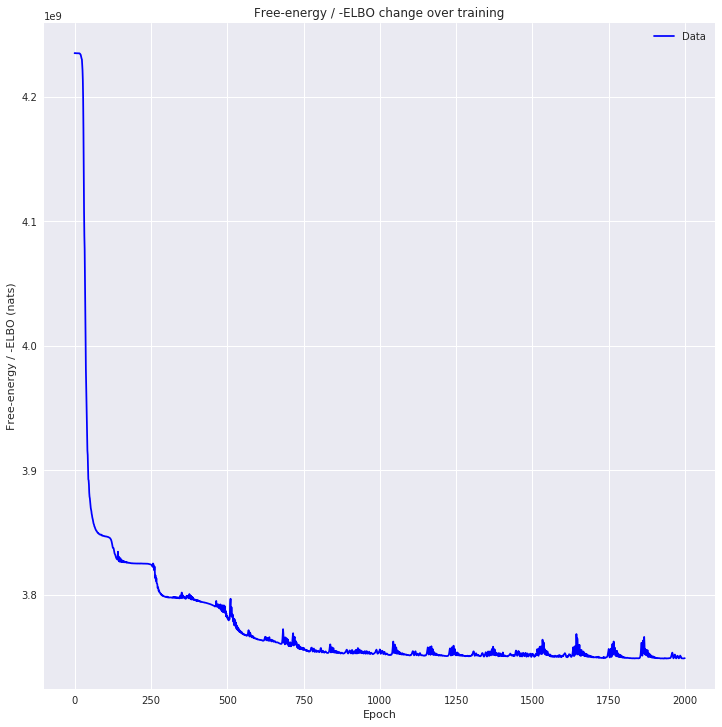

In [9]:
utils.plot_losses(losses)

In [11]:
posterior_sample, _ = dtfa.sample(posterior_predictive=True, num_particles=1)